In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_path = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
test_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test"
validation_path = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"

In [5]:
def load_data(path):
    categories = []
    images = []
    for category in os.listdir(path):
        category_path = os.path.join(path, category)
        for image in os.listdir(category_path):
            img_path = os.path.join(category_path, image)
            img = cv2.imread(img_path)
            if img is not None:  
                img = cv2.resize(img, (224, 224))  
                images.append(img)
                categories.append(category)
    return np.array(images), np.array(categories)


train_images, train_labels = load_data(train_path)
test_images, test_labels = load_data(test_path)
val_images, val_labels = load_data(validation_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

In [6]:
fig = px.imshow(train_images[0])
fig.update_layout(title="Sample Image from Training Set")
fig.show()

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_path, target_size=(224, 224),
                                                        batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                  batch_size=32, class_mode='categorical', shuffle=False)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

I0000 00:00:1725182970.313816     153 service.cc:145] XLA service 0x7bd8c8002110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725182970.313880     153 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725182970.313884     153 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/98 ━━━━━━━━━━━━━━━━━━━━ 40:41 25s/step - accuracy: 0.0938 - loss: 4.1124

I0000 00:00:1725182985.567967     153 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 2/98 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.0859 - loss: 4.1076

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



98/98 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.0815 - loss: 3.6353 - val_accuracy: 0.4387 - val_loss: 2.3838
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.2514 - loss: 2.8117 - val_accuracy: 0.6068 - val_loss: 1.7217
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.3216 - loss: 2.4437 - val_accuracy: 0.6923 - val_loss: 1.3561
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.3858 - loss: 2.2356 - val_accuracy: 0.7749 - val_loss: 1.1065
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.4271 - loss: 2.0220 - val_accuracy: 0.7863 - val_loss: 0.9886
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.4594 - loss: 1.9124 - val_accuracy: 0.8120 - val_loss: 0.8795
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.5074 - loss: 1.7917 - val_accuracy: 0.8120 - val_loss: 0.7940
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.5162 - loss: 1.7097 - val_accuracy: 0.8405 - val_loss: 0.

In [10]:
base_model.trainable = True
for layer in base_model.layers[:15]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7084 - loss: 0.9602 - val_accuracy: 0.9316 - val_loss: 0.2393
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7416 - loss: 0.8386 - val_accuracy: 0.9459 - val_loss: 0.2106
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7823 - loss: 0.7078 - val_accuracy: 0.9487 - val_loss: 0.2099
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7740 - loss: 0.7290 - val_accuracy: 0.9487 - val_loss: 0.2029
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7849 - loss: 0.6698 - val_accuracy: 0.9516 - val_loss: 0.2049
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7996 - loss: 0.6463 - val_accuracy: 0.9516 - val_loss: 0.1836
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.8086 - loss: 0.6000 - val_accuracy: 0.9573 - val_loss: 0.1918
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8028 - loss: 0.6248 - val_accuracy: 0.9544 - v

In [11]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9514 - loss: 0.2142 
Test Accuracy: 96.10%


In [12]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))


cm = confusion_matrix(test_generator.classes, y_pred)


cm_fig = px.imshow(cm, labels=dict(x="Predicted", y="True", color="Count"), x=list(test_generator.class_indices.keys()), y=list(test_generator.class_indices.keys()), text_auto=True)
cm_fig.update_layout(title="Confusion Matrix")
cm_fig.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 893ms/step
Classification Report
               precision    recall  f1-score   support

        apple       0.71      1.00      0.83        10
       banana       0.88      0.78      0.82         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      0.90      0.90        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.82      0.90      0.86        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.90      0.90      0.90        10
         corn       0.89      0.80      0.84        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10


In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines', name='Train Accuracy'))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig.update_layout(title='Model Accuracy', xaxis=dict(title='Epoch'), yaxis=dict(title='Accuracy'))
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines', name='Train Loss'))
fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig.update_layout(title='Model Loss', xaxis=dict(title='Epoch'), yaxis=dict(title='Loss'))
fig.show()

fig_fine = go.Figure()
fig_fine.add_trace(go.Scatter(y=history_fine.history['accuracy'], mode='lines', name='Fine-tune Train Accuracy'))
fig_fine.add_trace(go.Scatter(y=history_fine.history['val_accuracy'], mode='lines', name='Fine-tune Validation Accuracy'))
fig_fine.update_layout(title='Fine-tuning Model Accuracy', xaxis=dict(title='Epoch'), yaxis=dict(title='Accuracy'))
fig_fine.show()

fig_fine_loss = go.Figure()
fig_fine_loss.add_trace(go.Scatter(y=history_fine.history['loss'], mode='lines', name='Fine-tune Train Loss'))
fig_fine_loss.add_trace(go.Scatter(y=history_fine.history['val_loss'], mode='lines', name='Fine-tune Validation Loss'))
fig_fine_loss.update_layout(title='Fine-tuning Model Loss', xaxis=dict(title='Epoch'), yaxis=dict(title='Loss'))
fig_fine_loss.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


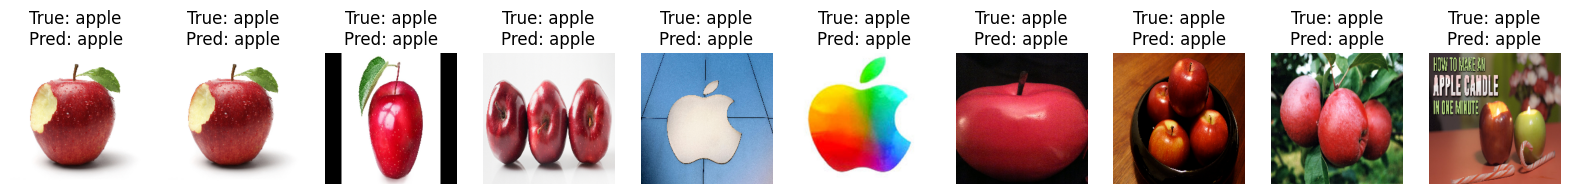

In [14]:
def display_predictions(generator, model, num_images=10):
    images, labels = next(generator)
    predictions = model.predict(images)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i])
        true_label = list(generator.class_indices.keys())[np.argmax(labels[i])]
        pred_label = list(generator.class_indices.keys())[np.argmax(predictions[i])]
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis('off')
    plt.show()

display_predictions(test_generator, model)

In [15]:
model.save('/kaggle/working/fruit_veg_classifier.h5')